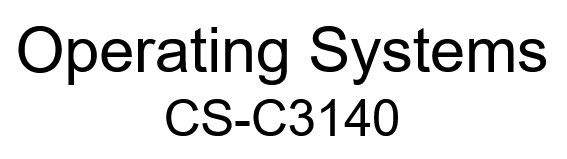

#Assignment 8: Exploring the Linux Shell

The Linux shell is not something completely new in this course. You already used the shell in the previous assignments, where shell commands were already provided to you. In this assignment, we will take a step back and look at basics around using the Linux shell (some of the commands apply to the [bash shell in MacOS](https://www.macinstruct.com/tutorials/how-to-set-bash-as-the-default-shell-on-mac/), too). For more insights about the Bash shell, we recommend the following tutorials:
* https://www.codecademy.com/catalog/language/bash
* https://linuxcommand.org/tlcl.php
* https://mywiki.wooledge.org/BashGuide

**Note**: This assignment can be completed in a number of ways:
* Using this Google Colab notebook (please save your own copy and work on that, instructions below) <- easiest
* Using your own Linux machine (any distro)
* Using a Linux virtual machine (e.g. the TinyOS VM from Assignments 5-6)
* Over an SSH connection to [Aalto shell servers](https://www.aalto.fi/en/services/linux-shell-servers-at-aalto)

Please feel free to use the option that works best for you. Please enter the results in the [A+ platform](https://plus.cs.aalto.fi/accounts/login/?next=/os/2022/). For any questions please refer to the [Zulip chat of the OS course](https://operatingsystems.zulip.aalto.fi/).

**Note**: The [Exercise: Shell Scripts and Signals](#scrollTo=ERqhqHZfTMAs) part will require you to complete a set of `TODOs`. The answers should be reported in the A+ platform.

**Note**: The [Exercise: Shell Scripts and Signals](#scrollTo=ERqhqHZfTMAs) exercises require you to use two terminal windows for a better understanding of how signals work.

>[Assignment 8: Exploring the Linux Shell](#scrollTo=V2GMVV4UvQOG)

>[What is the shell?](#scrollTo=GUNYl5f9y5fm)

>>[Man Pages](#scrollTo=XI39TyK1_qUC)

>>[Looking around the filesystem](#scrollTo=VtqBbfSQwZCe)

>>[Moving around the filesystem](#scrollTo=kjISIR9cAF-m)

>>[Printing things out: echo and $VARIABLES](#scrollTo=7kEkuwE7DVxD)

>>[Working with files](#scrollTo=2AnUTvHbFI8s)

>>[Combining commands](#scrollTo=dk_Kd-7NNB-3)

>>[Pipes](#scrollTo=Ihri1ar0ivel)

>[Shell Scripts](#scrollTo=Y_zfqe3QKaUI)

>>[What is a bash script?](#scrollTo=aZPi4ixasy46)

>>[A first bash script](#scrollTo=Gj4WdwRRs3IJ)

>[Signals](#scrollTo=pyp9f-QwOmtv)

>[Exercise: Shell Scripts and Signals](#scrollTo=ERqhqHZfTMAs)



**Note**: If you are unsure how to use Google Colab for running code/scripts, please refer to `How to use Google Colab` section from Assignment 4 :
https://colab.research.google.com/drive/1X1xFIkDCyuQuiwv9RoKnWHh6xuCELzAj?usp=sharing#scrollTo=MvYnYMkSlc05



# What is the shell?

GNU/Linux is one of the most widely used Operating Systems, especially in the domains of embedded systems, IoT, and servers. Everything from cloud servers to washing machines run it. The primary aspect of Linux "knowledge" is knowing how to work with the Shell. As the shell is not a graphical interface, it takes time and some memorization to learn.

We can view the shell as a program where users can type commands. It is possible to navigate around the filesystem, write code, modify devices, and even execute compiled programs. 

The most popular Unix shell is Bash: https://en.wikipedia.org/wiki/Bash_(Unix_shell) . It is the default shell in most modern implementations of Unix and Linux distributions. 



## 0. Man Pages

**Hint: How do we know everything a command is capable of? Googling?**

There is a better way: when you are in the shell you can look at a command's dodcumentation right there and then, by preceding the command with 'man' (e.g. 'man ls'). Indeed, the shell comes in with all manuals pre-packaged!

## 1. Looking around the filesystem

At any given point while using the shell, we are located somewhere in the Linux Filesystem.



This is also known as the "working directory". Luckily, there is a handy command for seeing where we are, so we never get lost:
```
pwd
```
This command will display the exact directory we are currently in. Try it out for yourself:

In [ ]:
# Where are we?
!pwd

/content


And in fact, the command itself tells us a lot about what it does: 'pwd' stands for 'present working directory'.
Speaking of conveniently named commands, every time we are in the shell, we will be known as a user of the system. And every user has a name (e.g. admin or root). In case you are unsure of what user you are logged in as, you can use the command:
```
whoami
```

In [ ]:
# Who am I?
!whoami

root


Once we know where and who we are, we can look around the environment. This is perhaps the most used Linux shell command:
```
ls
```

In [ ]:
# List the current directory contents
!ls

sample_data


A lot of shell commands are more powerful than they seem. They can be passed "flags" to make them do extra stuff, or do it in a more presentable manner. Generally, a flag will be a letter or a codeword preceded by a dash (-).\
Let's see what more 'ls' can do: 

In [ ]:
# List the contents with some more information
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Nov 15 14:31 sample_data


## 2. Moving around the filesystem

So we know how to look around the environment. But how do we move through the filesystem? Let's introduce some more essential commands.


```
cd
```
'cd' stands for 'change directory' and does exactly that - it changes our current location to a directory. Moreover, the Linux filesystem has 2 special symbols that can be found at virtually every directory:
```
A pointer to the current directory: .
A pointer to the top-level directory above: ..
```
Indeed, you must have seen those 2 symbols when running 'ls -l'\
Let's put all of this into context (you will have to run the following commands in sequence):

In [ ]:
# Create a new directory in the present directory
!mkdir new_dir

In [ ]:
# Check directory was created
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Nov 17 09:00 new_dir
drwxr-xr-x 1 root root 4096 Nov 15 14:31 sample_data


In [ ]:
# Let's change to the new dir
%cd new_dir

/content/new_dir


In [ ]:
# Are we there?
!pwd

/content/new_dir


In [ ]:
# Is there anything inside? (we didn't put anything in, but there must be pointers to itself and the directory above)
!ls -l

total 0


In [ ]:
# Let's go back to the directory above
%cd ..
# (we just change directory to the pointer already pointing above)

/content


In [ ]:
# Are we back?
!pwd

/content


In [ ]:
# Let's remove the directory we just created
!rmdir new_dir

## 3. Printing things out: echo and $VARIABLES
We are now familiar with what the shell is and how to run commands. And we've learned some useful commands too. However, what happens to our commands when we enter them? They answer is that they get "interpreted" by the shell and executed. What if we wanted to just print them out? Or just print any message out?




Fortunately just like with everything else in the Linux shell, there is a command for that!
```
echo
```

In [ ]:
# Where are we?
!pwd

/content


In [ ]:
# Just print the command, don't run it
!echo pwd

pwd


Obviously, printing out commands is not very useful. Echo is more frequently used to show us variable - shell variables! Now, shell variables, just like variables in any other programming language, are symbolic pointers to a piece of information that we frequently need to access.

When you are in the Linux shell, there is one variable that will always exist, and that is the "home directory" variable HOME. Let's try printing it out (pay attention to the syntax):

In [ ]:
# Print out HOME
!echo $HOME

/root


That's right - the shell knows HOME is a variable as it's preceded by a dollar sign ($). Also, in shell scripting, variables are conventionally always in CAPITAL LETTERS.

## 4. Working with files
Most tasks you'd have to complete in the shell would involve files: text files, csv, source code etc. So let's look at how to work with those.




Creating a new file in the shell is easy (easier than right-clicking with the mouse if File Explorer). We can use a new command:
```
touch
```
Let's try it out:

In [ ]:
# Create a new file
!touch foo.txt

In [ ]:
# Is it there?
!ls

foo.txt  sample_data


We already know how to print to the console. Why not print it out to a file? In the shell, you can 're-direct' command output away from to console, into files:

In [ ]:
# Create a new text file with the text "Hello from file"
!echo Hello from file >> hello.txt

In [ ]:
# Is it there?
!ls

foo.txt  hello.txt  sample_data


So we have our two files now: one is empty, the other one (hopefully) has some text in it. Can we check that?

In the File Explorer, you would usually double-click the file to look at it's contents. But we can also do that in the Linux shell. There are many ways to do so:
1. Look at the whole contents: `cat`
2. Look only at the start: `head`
3. Look only at the end: `tail`
4. Look at the whole contents, but interactively page-by-page: `less`


In [ ]:
# Look at hello.txt
!cat hello.txt

Hello from file


In [ ]:
# Look at foo.txt
!cat foo.txt
# Empty?

In [ ]:
# Write 'Hello' to it 10 times
!seq 10 | sed "c Hello" >> foo.txt
# What's in there now?
!cat foo.txt

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


In [ ]:
# Let's look at the first 5 lines only
!head -n 5 foo.txt

Hello
Hello
Hello
Hello
Hello


**Hint: We used a few more advanced commands. You can read more about them from the respective manuals (e.g. 'man head')**

## 5. Combining commands
Shell commands are very powerful. But sometimes our task is more complex and we need to run a few of them in sequence. Running them one after the other takes time and what if some fail?\
Luckily, the Linux shell allows us to chain commands up in a sequence. There are multiple operators we can use:
```
&& - runs a command only if the previous one succeeded (like an AND)
|| - runs a command only if the previous one failed (like an OR)
;  - runs a command regardless of whether the previous one succeeded or failed (like lines of code in C)
```

In [ ]:
# Let's create a new directory followed by another one
!ls
!mkdir dir_a && mkdir dir_b
!ls

foo.txt  hello.txt  sample_data
dir_a  dir_b  foo.txt  hello.txt  sample_data


In [ ]:
# Let's see if this works when directory creation fails
!ls
!mkdir dir_b && mkdir dir_c
!ls

dir_a  dir_b  foo.txt  hello.txt  sample_data
mkdir: cannot create directory ‘dir_b’: File exists
dir_a  dir_b  foo.txt  hello.txt  sample_data


In [ ]:
# Let's try again
!ls
!mkdir dir_b; mkdir dir_c
!ls

dir_a  dir_b  foo.txt  hello.txt  sample_data
mkdir: cannot create directory ‘dir_b’: File exists
dir_a  dir_b  dir_c  foo.txt  hello.txt  sample_data


## 6. Pipes
We all know what pipes are in plumbing. Hollow cyllinders allowing a liquid to flow from one end to the other. The Linux shell has the same concept - pipes allow the output of one command to be forwarded to another and so on. They are represented by the '|' symbol.\
Let's look at an example:
```
cat groceries.txt | sort
cat grocercies.txt | sort | uniq
```
Can you guess what the commands above do? Some of them are new, so it might be a good idea to look them up with `man`

In [ ]:
# Let's set up the text file
!printf "apples\noranges\napples\nbananas\noranges\noranges\npears\nbroccoli" >> groceries.txt
!cat groceries.txt

apples
oranges
apples
bananas
oranges
oranges
pears
broccoli

In [ ]:
# Let's try out the first "piped" command
!cat groceries.txt | sort

apples
apples
bananas
broccoli
oranges
oranges
oranges
pears


In [ ]:
# Let's try out the second one
!cat groceries.txt | sort | uniq

apples
bananas
broccoli
oranges
pears


Indeed, pipes are a very powerful tool. Here's another example of what the shell is capable of (this won't work in collab so you can only try running it on your own Linux installation):
```
echo "Timestamp Time_Delay_ms" >> ping_delays.csv && ping -c 5 -W 10 -O -D ok1.iperf.comnet-student.eu | grep '64 bytes from\|no answer yet' | awk '{printf "%s ", substr($1, 2, 17); if ($9) print substr($9,6); else print "Inf"}' >> ping_delays.csv
```
Any guesses what the above does?\
Here's a short summary:

*   Creates a CSV file named "ping_delays.csv" with 2 columns: "Timestamp" and "Time_Delay_ms"
*   Runs the "ping" Linux utility which sends 5 ICMP packets to the remote iperf server "ok1.iperf.comnet-student.eu" with a timeout of 10 seconds
*   Scans the output and looks at whether the ICMP packets bounced back
*   If a packet came back, its RTT (round trip time) is recorded in the CSV file, on its own row, together with the timestamp of when it came back
*   If a packet was dropped, same as above, but with an RTT of Inf (infinity)


This is just one example of how pwoerful the Linux shell is. We can analyse our conection to a remote server with a single line.



# Shell Scripts


A shell script is a text file that contains a line-by-line sequence of commands for a UNIX-based operating system. It is called a shell script because it combines a sequence of commands, that would otherwise have to be typed into the keyboard one at a time, into a single script.

A shell script is usually created for command sequences in which a user has a need to use repeatedly in order to save time. Like other programs, the shell script can contain parameters, comments and subcommands that the shell must follow.

## What is a bash script?

Most users prefer to stick with the current default shell. The default shell for many Linux distros is the GNU Bourne-Again Shell (bash).

An example of bash script could execute the following sequence
* navigate to a certain path
* create a folder 
* spawn a process inside the new folder

## A first bash script

We will create a very simple bash script that will output a message. By naming conventions, bash scripts end with a `.sh`. However, bash scripts can run perfectly fine without the sh extension.

First, let's create the `.sh` file and check that it is ceated in our current directory.

In [ ]:
!touch first_script.sh && ls

dir_a  dir_c		foo.txt        hello.txt
dir_b  first_script.sh	groceries.txt  sample_data


Next, let's add some content to the file.

In [ ]:
!printf "echo \"Hello, the script just ran!\"" >> first_script.sh

We will need to set up permissions to run the script we just created. We will modify the file permissions and allow execution of the script by using the command below: 

In [ ]:
!chmod u+x first_script.sh

After doing this, we should successfully be able to run our script! 
You can run the script in the following ways:


*   `./script_name.sh`
*   `bash script_name.sh`



In [ ]:
! ./first_script.sh

Hello, the script just ran!


# Signals

Signals are short, fast, one-way messages sent to processes such as scripts, programs, and daemons. They let the process know about something that has happened.



The Linux kernel sends signals to processes about events they need to react to. Well-behaved scripts handle signals elegantly and robustly and can clean up behind themselves even if you hit Ctrl+C. Linux uses a lot of signals, as we shall see, but from a scripting point of view, there’s only a small subset of signals that you’re likely to be interested in. In particular, in non-trivial scripts, signals that tell the script to shut down should be trapped (where possible) and a graceful shutdown performed.

For example, scripts that create temporary files or open firewall ports can be given the chance to delete the temporary files or to close the ports before they shut down. If the script just dies the instant it receives the signal, your computer can be left in an unpredictable state.

We can use the `trap` command with the -l (list) option to show us the entire list of signals that Linux uses.

In [ ]:
!man trap

TRAP(1POSIX)               POSIX Programmer's Manual              TRAP(1POSIX)

PPRROOLLOOGG
       This  manual  page is part of the POSIX Programmer's Manual.  The Linux
       implementation of this interface may differ (consult the  corresponding
       Linux  manual page for details of Linux behavior), or the interface may
       not be implemented on Linux.

NNAAMMEE
       trap — trap signals

SSYYNNOOPPSSIISS
       trap _n [[_c_o_n_d_i_t_i_o_n...]]
       trap [[_a_c_t_i_o_n _c_o_n_d_i_t_i_o_n...]]

DDEESSCCRRIIPPTTIIOONN
       If the first operand is an unsigned decimal integer,  the  shell  shall
       treat all operands as conditions, and shall reset each condition to the
       default value. Otherwise, if there are operands, the first  is  treated
       as an action and the remaining as conditions.

       If  _a_c_t_i_o_n  is ''−−'', the shell shall reset each _c_o_n_d_i_t_i_o_n to the default

In [ ]:
! trap -l

 1) SIGHUP	 2) SIGINT	 3) SIGQUIT	 4) SIGILL	 5) SIGTRAP
 6) SIGABRT	 7) SIGBUS	 8) SIGFPE	 9) SIGKILL	10) SIGUSR1
11) SIGSEGV	12) SIGUSR2	13) SIGPIPE	14) SIGALRM	15) SIGTERM
16) SIGSTKFLT	17) SIGCHLD	18) SIGCONT	19) SIGSTOP	20) SIGTSTP
21) SIGTTIN	22) SIGTTOU	23) SIGURG	24) SIGXCPU	25) SIGXFSZ
26) SIGVTALRM	27) SIGPROF	28) SIGWINCH	29) SIGIO	30) SIGPWR
31) SIGSYS	34) SIGRTMIN	35) SIGRTMIN+1	36) SIGRTMIN+2	37) SIGRTMIN+3
38) SIGRTMIN+4	39) SIGRTMIN+5	40) SIGRTMIN+6	41) SIGRTMIN+7	42) SIGRTMIN+8
43) SIGRTMIN+9	44) SIGRTMIN+10	45) SIGRTMIN+11	46) SIGRTMIN+12	47) SIGRTMIN+13
48) SIGRTMIN+14	49) SIGRTMIN+15	50) SIGRTMAX-14	51) SIGRTMAX-13	52) SIGRTMAX-12
53) SIGRTMAX-11	54) SIGRTMAX-10	55) SIGRTMAX-9	56) SIGRTMAX-8	57) SIGRTMAX-7
58) SIGRTMAX-6	59) SIGRTMAX-5	60) SIGRTMAX-4	61) SIGRTMAX-3	62) SIGRTMAX-2
63) SIGRTMAX-1	64) SIGRTMAX	


# Exercise: Shell Scripts and Signals

Let us manage signals by creating shell script functions:
* Try to understand and learn the syntax of the `trap` command.
* Create a bash script titled `my_script.sh` with the following content
* After completing the `TODOs`, run the commands provided.


```
sigquit()
{
   echo "quitting signal received"
}

sigint()
{
   echo "script ending"
   exit 0
}

# TODO 1: replace ... with the right signal
trap 'sigquit' ...

# TODO 2: replace ... with the right signal
trap 'sigint'  ...

echo "Script with process ID $$ just started!"

while true 
do
  sleep 100
done
```

The commands needed to run the following script have the following syntax:

**TODO 3:** replace AAA and BBB with the right parameters.
```
$ kill AAA  BBB
```

After this, let's try to run our script. Let's add the right permissions to it and run it afterwards.

In [ ]:
! chmod u+x my_script.sh && ./my_script.sh

chmod: cannot access 'my_script.sh': No such file or directory


Now, open a new terminal window and run the kill command with the right parameters to see the signals in action.